In [238]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [7]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
print(gender_submission.shape)
gender_submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [21]:
train_test = pd.concat([train, test])
train_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [22]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [34]:
print(train_test['Pclass'].value_counts())
print(train_test['Sex'].value_counts())
print(train_test['SibSp'].value_counts())
print(train_test['Parch'].value_counts())
print(train_test['Ticket'].value_counts())
print(train_test['Fare'].value_counts())
print(train_test['Cabin'].value_counts())
print(train_test['Embarked'].value_counts())

3    709
1    323
2    277
Name: Pclass, dtype: int64
male      843
female    466
Name: Sex, dtype: int64
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64
0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64
CA. 2343           11
1601                8
CA 2144             8
3101295             7
347082              7
                   ..
SC/AH Basle 541     1
SC/PARIS 2168       1
STON/OQ. 369943     1
PC 17598            1
19952               1
Name: Ticket, Length: 929, dtype: int64
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F2                 4
F33                4
                  ..
F                  1
A32                1
D7                 1
B42                1
D43            

Text(0.5, 1.0, 'Embarked')

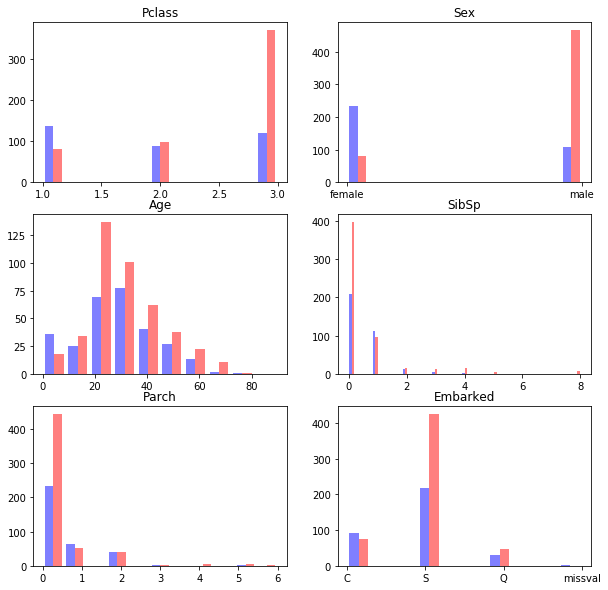

In [110]:
df_survived = train_test[train_test['Survived'] == 1.0]
df_nonsurvived = train_test[train_test['Survived'] == 0.0]

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0,0].hist([df_survived['Pclass'], df_nonsurvived['Pclass']], color=['blue', 'red'], alpha=0.5, bins='auto')
axs[0,0].set_title('Pclass')
axs[0,1].hist([df_survived['Sex'], df_nonsurvived['Sex']], color=['blue', 'red'], alpha=0.5, bins='auto')
axs[0,1].set_title('Sex')
axs[1,0].hist([df_survived['Age'], df_nonsurvived['Age']], color=['blue', 'red'], alpha=0.5, range=(0, 90))
axs[1,0].set_title('Age')
axs[1,1].hist([df_survived['SibSp'], df_nonsurvived['SibSp']], color=['blue', 'red'], alpha=0.5, bins='auto')
axs[1,1].set_title('SibSp')
axs[2,0].hist([df_survived['Parch'], df_nonsurvived['Parch']], color=['blue', 'red'], alpha=0.5, bins='auto')
axs[2,0].set_title('Parch')
axs[2,1].hist([df_survived['Embarked'].fillna('missval'), df_nonsurvived['Embarked'].fillna('missval')], color=['blue', 'red'], alpha=0.5)
axs[2,1].set_title('Embarked')

In [224]:
temp = pd.DataFrame()
temp['survived'] = train_test['Survived']
temp['cab'] = train_test['Cabin'].fillna('N').apply(lambda x : x[:1])
temp['cabnum'] = train_test['Cabin'].fillna('N').apply(lambda x : x[1:3])
#temp = temp[temp['cab'] != 'N']
temp.loc[temp['cabnum'].str.contains(' '), 'cabnum'] = 0
temp.loc[temp['cabnum'] == '', 'cabnum'] = 0
temp['cabnum'].astype(int)
pd.set_option('display.max_rows', 90)
temp['cabnum'].value_counts()

0     1027
10      18
12      12
6        9
11       8
33       8
34       7
22       7
23       7
2        6
78       6
36       5
49       5
31       5
57       5
45       5
46       5
4        5
50       5
28       5
20       5
30       4
58       4
24       4
52       4
26       4
35       4
19       4
51       4
38       4
7        4
96       4
18       3
80       3
68       3
77       3
17       3
32       3
86       3
21       3
37       3
5        3
39       3
65       2
71       2
83       2
25       2
44       2
67       2
9        2
69       2
8        2
62       2
15       2
54       2
40       2
92       2
55       2
85       2
13       2
93       2
41       2
89       2
82       2
47       2
14       2
56       1
43       1
97       1
3        1
16       1
90       1
79       1
87       1
63       1
53       1
60       1
48       1
29       1
99       1
95       1
61       1
91       1
42       1
70       1
94       1
73       1
Name: cabnum, dtype: int64

In [228]:
temp['cab'].value_counts()

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cab, dtype: int64

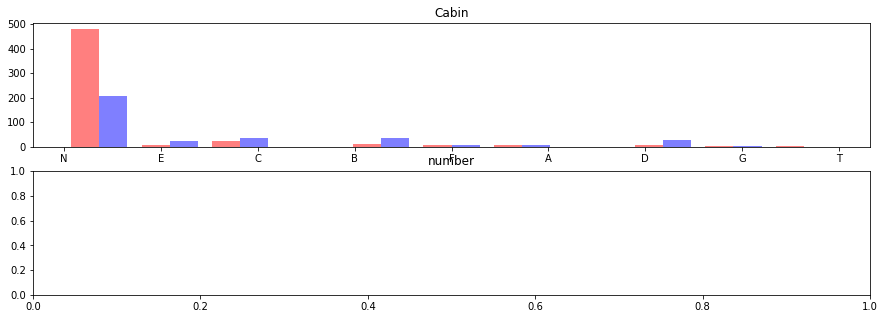

In [229]:
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
ax[0].hist([temp[temp['survived']==0.0]['cab'], temp[temp['survived']==1.0]['cab']], alpha=0.5, bins='auto', color=['red', 'blue'])
ax[0].set_title('Cabin')
#ax[1].hist([temp[temp['survived']==0.0]['cabnum'], temp[temp['survived']==1.0]['cabnum']], alpha=0.5, color=['red', 'blue'], bins='auto')
ax[1].set_title('number')
plt.show()

In [239]:
feature = train_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
le = LabelEncoder()
feature['Sex'] = le.fit_transform(feature['Sex'])
feature = pd.get_dummies(feature, columns=['Embarked'], drop_first=True)
feature.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.0,3,1,22.0,1,0,7.2500,0,1
1,1.0,1,0,38.0,1,0,71.2833,0,0
2,1.0,3,0,26.0,0,0,7.9250,0,1
3,1.0,1,0,35.0,1,0,53.1000,0,1
4,0.0,3,1,35.0,0,0,8.0500,0,1


In [270]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Sex         1309 non-null   int32  
 3   Age         1309 non-null   float64
 4   SibSp       1309 non-null   int64  
 5   Parch       1309 non-null   int64  
 6   Fare        1308 non-null   float64
 7   Embarked_Q  1309 non-null   uint8  
 8   Embarked_S  1309 non-null   uint8  
dtypes: float64(3), int32(1), int64(3), uint8(2)
memory usage: 119.3 KB


In [267]:
feature.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,891.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000
mean,0.383838,2.294882,0.644003,29.881138,0.498854,0.385027,33.295479,0.093965,0.698243
std,0.486592,0.837836,0.478997,14.413493,1.041658,0.865560,51.758668,0.291891,0.459196
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000


In [269]:
feature.loc[feature['Age'].isnull(), 'Age'] = feature['Age'].mean()

In [271]:
feature.loc[feature['Fare'].isnull(), 'Fare'] = feature['Fare'].mean()

In [334]:
train_X = feature[feature['Survived'].notnull()].drop(['Survived'], axis=1)
train_y = feature[feature['Survived'].notnull()]['Survived']
test_X = feature[feature['Survived'].isnull()].drop(['Survived'], axis=1)
test_y = feature[feature['Survived'].isnull()]['Survived']

In [331]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np


sc = StandardScaler()
sc.fit(train_X)
train_X_std = sc.transform(train_X)

# SVM Grid Search
'''
param_grid = {'C': np.logspace(-3, 2, num=6), 'gamma': np.logspace(-3, 2, num=6)}
gs = GridSearchCV(estimator=SVC(kernel='rbf', random_state=1), param_grid=param_grid, cv=5)
gs.fit(train_X_std, train_y)
print('Best cross validation score:', gs.best_score_)
print('Best parameters: ', gs.best_params_)
'''

#tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
#model = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)

#model = RandomForestClassifier(random_state=0)
#model = SVC(kernel='rbf', random_state=1, gamma=0.01, C=100.0)


#scores = cross_val_score(estimator=model, X=train_X_std, y=train_y, cv=5, n_jobs=-1)


#model.fit(train_X, train_y)
#model.score(train_X, train_y)
#z = model.predict(test_X).astype(int)
#scores

[0.0]

In [291]:
gender_submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,0.0


In [292]:
gender_submission['Survived'] = z

In [293]:
gender_submission.to_csv('prediction/random_forest.csv', index=False)

In [396]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True).split(train_X, train_y)
scores = []
lgbm_params = {'objective': 'binary', 'seed': 1, 'metrics': 'binary_loggloss'}

for k, (train, test) in enumerate(kfold):
    
    lgb_train = lgb.Dataset(train_X.iloc[train], train_y.iloc[train])
    
    model = lgb.train(lgbm_params, lgb_train, num_boost_round=40)
    
    pred = model.predict(train_X.iloc[test], num_iteration=model.best_iteration)
    pred_class = np.empty((len(pred), ))
    for i, prob in enumerate(pred):
        if prob > 0.5:
            pred_class[i] = 1.0
        else:
            pred_class[i] = 0.0
            
    scores.append(accuracy_score(train_y.iloc[test], pred_class))
    
scores


[0.8100558659217877,
 0.8707865168539326,
 0.7865168539325843,
 0.8258426966292135,
 0.8539325842696629]